# 1. Análise exploratória das publicações com desconto do Marketplace

### Primeira parte: Construção da base de dados via API:

In [1]:
#Pacotes utilizados nessa primeira parte:
import requests        # Conexão API
import json            # Ler arquivos no formato Json
import pandas as pd    # Pacote para trabalhar com data frames
from matplotlib import pyplot as plt  #Trabalhar com gráficos do matplotlib
import seaborn as sns   # Pacote de gráficos do seaborn (melhor visual)
import numpy as np

#### Sendo livre a análise, foi decidido realizar a coleta de publicações no site referentes a sete categorias diferentes: Celulares e telefones, Informática, Consoles e Video games, Alimentos e bebidas, Animais e bichos de estimação, Beleza e cuidado pessoal e Roupas e acessórios. Ao final de toda a coleta de forma separada, juntou-se todas as informações em uma base única. 
#### Durante a coleta notou-se que só era possivel acessar no máximo mil publicações referentes a uma pesquisa sem possuir senha, dessa forma a base única gerada teve no máximo sete mil linhas. Além disso, só era possivel coletar cinquenta observações por página, por isso, foi preciso realizar uma iteração para conseguir coletar as mil informações. Ao final de cada extração, foi definido 12 variáveis principais para se trabalhar no estudo.

In [2]:
# BASE CELULARES E TELEFONESS:
url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1051&offset=0&limit=50" #Link para gerar os primeiros 50 resultados
payload = ""

response = requests.request("GET", url, data=payload).json() #Função que faz o acesso com a API e lê arquivo Json.
Cel_tel = pd.DataFrame(response["results"]) # Cria um data frame com as 50 primeiras observações, results é a parte que interessa.
#Cel_tel
#Iteração para coletar as outras 950 observações, ao final de cada iteração é feito o append das bases e 
#tendo assim uma base final da categoria.

#Limit e Offset são parâmetros importantes para mudarem em cada iteração: limit da página sempre é 50, então se faz 50* cada 
#interação para acessar todas as páginas.  50*20 = 1000 informações.
limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1051&offset={offset}&limit={limit}" 
    #print(url) #Para verificar todas iterações, sendo printadas
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Cel_tel = Cel_tel.append(response)

#Base final de Celulares
Cel_tel["Categoria_geral"] = "Celular y Telefones"

#Foi feito o mesmo processo para as próximas 6 categorias:

#Foi definida já as variáveis que vou trabalhar para que na união das bases de certo de se fazer o append.
Cel_tel = Cel_tel[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

In [4]:
# BASE INFORMÁTICA:

url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1648&offset=0&limit=50"
payload = ""

response = requests.request("GET", url, data=payload).json()
Comp = pd.DataFrame(response["results"])
#Comp

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1648&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Comp = Comp.append(response)

#Comp
Comp["Categoria_geral"] = "Computación"
Comp = Comp[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

In [6]:
# BASE CONSOLES E VIDEOGAMES:

url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1144&offset=0&limit=50"
payload = ""

response = requests.request("GET", url, data=payload).json()
Game = pd.DataFrame(response["results"])
#Game

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1144&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Game = Game.append(response)

#Game
Game["Categoria_geral"] = "Consolas y Videojuegos"
Game = Game[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

C:\Users\estudos\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [7]:
# BASE ALIMENTOS E BEBIDAS:
url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1403&offset=0&limit=50"
payload = ""

response = requests.request("GET", url, data=payload).json()
Alimento = pd.DataFrame(response["results"])
#Alimento

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1403&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Alimento = Alimento.append(response)

Alimento
Alimento["Categoria_geral"] = "Alimentos y Bebidas"
Alimento = Alimento[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

In [8]:
# BASE ANIMAIS E BICHOS DE ESTIMAÇÃO:

url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1071&offset=0&limit=50"
payload = ""

response = requests.request("GET", url, data=payload).json()
Animais = pd.DataFrame(response["results"])
#Animais

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1071&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Animais = Animais.append(response)

#Animais
Animais["Categoria_geral"] = "Animais y Mascotas"
Animais = Animais[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

In [9]:
# BELEZA E CUIDADO PESSOAL:
url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1246&offset=0&limit=50"
payload = ""

response = requests.request("GET", url, data=payload).json()
Beleza = pd.DataFrame(response["results"])
#Animais

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1246&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Beleza = Beleza.append(response)

Beleza["Categoria_geral"] = "Beleza y cuidado personal"    
#Beleza
Beleza = Beleza[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

In [10]:
#ROUPAS E ACESSÓRIOS:

url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1430&offset=0&limit=50"
payload = ""

response = requests.request("GET", url, data=payload).json()
Ropa = pd.DataFrame(response["results"])
#Ropas

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?category=MLA1430&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    Ropa = Ropa.append(response)

#Ropa
Ropa["Categoria_geral"] = "Ropa y Accessorios"
Ropa = Ropa[["attributes", "available_quantity","category_id","condition","currency_id","original_price","price","seller",
                  "shipping","sold_quantity","title","Categoria_geral"]]

In [11]:
#Realizando o Append das bases, Base completa: 

df = Cel_tel.append(Comp)
df = df.append(Game)
df = df.append(Alimento)
df = df.append(Animais)
df = df.append(Beleza)
df = df.append(Ropa)

len(df) #Base de dados contendo 7000 linhas de resultados. (contendo = 1000 resultados para cada categoria) (última atualização)

7000

In [12]:
display(df.head(5)) #as 5 primeiras linhas do data frame contendo todas as informações coletadas.
df.shape # 

,attributes,available_quantity,category_id,condition,currency_id,original_price,price,seller,shipping,sold_quantity,title,Categoria_geral
0,"[{'name': 'Marca', 'value_struct': None, 'valu...",112,MLA1055,new,ARS,NaN,61999.0,"{'id': 608846165, 'permalink': 'http://perfil....","{'free_shipping': True, 'mode': 'me2', 'tags':...",505,Samsung Galaxy A52 128 Gb Awesome Violet 6 Gb Ram,Celular y Telefones
1,"[{'name': 'Marca', 'value_id': '2503', 'values...",76,MLA1055,new,ARS,NaN,34999.0,"{'id': 608846165, 'permalink': 'http://perfil....","{'free_shipping': True, 'mode': 'me2', 'tags':...",633,Moto G20 128 Gb Azul Glaciar 4 Gb Ram,Celular y Telefones
2,"[{'value_name': 'Alcatel', 'value_struct': Non...",207,MLA1055,new,ARS,NaN,10470.0,"{'id': 142125695, 'permalink': 'http://perfil....","{'free_shipping': True, 'mode': 'me2', 'tags':...",533,Alcatel 1 16 Gb Negro Metálico 1 Gb Ram,Celular y Telefones
3,"[{'id': 'BRAND', 'attribute_group_id': 'OTHERS...",554,MLA1055,new,ARS,NaN,89999.0,"{'id': 608846165, 'permalink': 'http://perfil....","{'free_shipping': True, 'mode': 'me2', 'tags':...",2688,Samsung Galaxy S20 Fe 128 Gb Cloud Mint 6 Gb Ram,Celular y Telefones
4,"[{'value_id': '2503', 'value_name': 'Motorola'...",15,MLA1055,new,ARS,NaN,95999.0,"{'id': 71229887, 'permalink': 'http://perfil.m...","{'free_shipping': True, 'mode': 'me2', 'tags':...",4,Motorola 20 Pro 256 Gb Blanco Optic 12 Gb Ram,Celular y Telefones


(7000, 12)

In [13]:
df.dtypes #Verificando o tipo de cada variável, existem as variáveis booleanas, objeto, inteiras e Float.

attributes             object
available_quantity      int64
category_id            object
condition              object
currency_id            object
original_price         object
price                 float64
seller                 object
shipping               object
sold_quantity           int64
title                  object
Categoria_geral        object
dtype: object

### Tipos de variáveis:

#### Das doze variáveis contidas no estudo, as quantitativas são: sold_quantity, price, original_price e available quantity. Algumas booleanas, float e do tipo object. Analisando cada variável, ainda pode-se notar que algumas delas não estavam da melhor maneira para se ter no banco de dados, é o caso de "Atributtes", "Seller" e "shipping" onde as informações estão como listas ou dicionários e precisamos separa-los para pegar informações importantes como : "Marca", "free_shipping" e "Power_seller_status". 
#### Dessa forma foi feita a separação dessas informações em novas colunas e também uma limpeza de atributos que não serão utilizados nas análises.

In [14]:
#df.columns
#Separação de variáveis que estavam dentro de listas/dicionários em colunas do dataframe: "Marca","free_shipping" 
#e "Power_seller_status"

#1. Marca:
Marca = pd.DataFrame(df['attributes'].tolist()) #Criando um dataframe chamado Marca com a lista que esta dentro de attributes
Marca = Marca.drop(Marca.columns[[1,2,3,4,5,6,7,8,9,10,11,12]], axis=1) #Ficando apenas com a coluna necessária: ONDE ESTA marca
Marca.rename(columns={0:'Marca'}, inplace=True)
Marca = Marca["Marca"].apply(pd.Series) #Separei com o pd.series cada lista da variável marca em colunas novamente.
Marca = Marca["value_name"] #Pegando a informação que interessa, "Value_name"
Marca = pd.DataFrame(Marca) #Coloco num dataframe

In [15]:
#2 Free_shipping
entrega_gratis = pd.DataFrame(df['shipping'].tolist())
entrega_gratis = entrega_gratis.drop(entrega_gratis.columns[[1,2,3,4]], axis=1)
entrega_gratis.rename(columns={"free_shipping":'entrega_gratis'}, inplace=True)
entrega_gratis = entrega_gratis["entrega_gratis"]
entrega_gratis = pd.DataFrame(entrega_gratis)

In [16]:
#3 Power_seller_status
Status_seller = pd.DataFrame(df['seller'].tolist())
Status_seller = Status_seller["seller_reputation"].apply(pd.Series)
Status_seller = Status_seller.drop(Status_seller.columns[[1,2,3,4,5]], axis=1)
Status_seller.rename(columns={"power_seller_status":'Reputação_vendedor'}, inplace=True)
Status_seller = Status_seller["Reputação_vendedor"]
Status_seller = pd.DataFrame(Status_seller)

In [17]:
#União das colunas criadas com a base de dados total: 
df = pd.concat([df.reset_index(drop=True), Marca], axis=1)
df = pd.concat([df.reset_index(drop=True), Status_seller], axis=1)
df = pd.concat([df.reset_index(drop=True), entrega_gratis], axis=1)

In [18]:
df.rename(columns={"value_name":"Marca"},inplace = True) #Renomeando coluna de Marca
df.columns

Index(['attributes', 'available_quantity', 'category_id', 'condition',
       'currency_id', 'original_price', 'price', 'seller', 'shipping',
       'sold_quantity', 'title', 'Categoria_geral', 'Marca',
       'Reputação_vendedor', 'entrega_gratis'],
      dtype='object')

### Variável que define desconto "sim" ou "Não"

#### Sabe-se que quando original_price é diferente de null significa que o produto possui desconto, dessa forma a próxima etapa foi criar esta variável binária. Além disso também foi criada a variável que define o valor do desconto, para isso, utilizou-se a variável preço e a própria original_price.

In [19]:
df.isnull().sum() #verificando onde temos observações null na base
#Nota-se que existem variáveis além de original_price com valores null, 2 delas,
#Nota-se também que cerca de 5800 observações não possuem desconto das 7000
#df = df.loc[:,~df.columns.isin(['real_level',"protection_end_date"])]

attributes               0
available_quantity       0
category_id              0
condition                0
currency_id              0
original_price        5849
price                    0
seller                   0
shipping                 0
sold_quantity            0
title                    0
Categoria_geral          0
Marca                   75
Reputação_vendedor     300
entrega_gratis           0
dtype: int64

In [20]:
df=df.fillna({'original_price':0}) #Onde tinha null coloquei 0 para trabalhar com essa variável

In [21]:
#Variável desconto feita com base em original_price
df["desconto"] = ["Sim" if a != 0 else "Não" for a in df["original_price"]]

In [22]:
df["desconto"].astype("category").describe() #Verificando se foram categorizados certos os individuos de acordo com a contagem anterior

count     7000
unique       2
top        Não
freq      5849
Name: desconto, dtype: object

In [23]:
#Variável valor do desconto criada:    
conditions = [
    (df["desconto"] == "Sim"),
df["desconto"]=="Não"]    # Criado um vetor com as condições

values = [df["original_price"]-df["price"],None]  #vetor com os resultados caso seja true or false
df['Valor_desconto'] = np.select(conditions, values) #função np.select para aplicar as condições
#Desconto aplicado:

### Análise Exploratória das publicações com desconto:

#### Nota-se que as categorias com maior quantidade de itens com desconto são Beleza e cuidado pessoal seguida de alimentos e bebidas. Celulares e telefones, Consoles e video games e animais e bichos de estimação são os que menos possuem desconto como mostra a tabela abaixo.

In [24]:
df.groupby("Categoria_geral")["desconto"].describe()

,count,unique,top,freq
Categoria_geral,,,,
Alimentos y Bebidas,1000,2,Não,696
Animais y Mascotas,1000,2,Não,904
Beleza y cuidado personal,1000,2,Não,674
Celular y Telefones,1000,2,Não,948
Computación,1000,2,Não,818
Consolas y Videojuegos,1000,2,Não,931
Ropa y Accessorios,1000,2,Não,878


#### O gráfico abaixo ilustra o que foi dito acima:

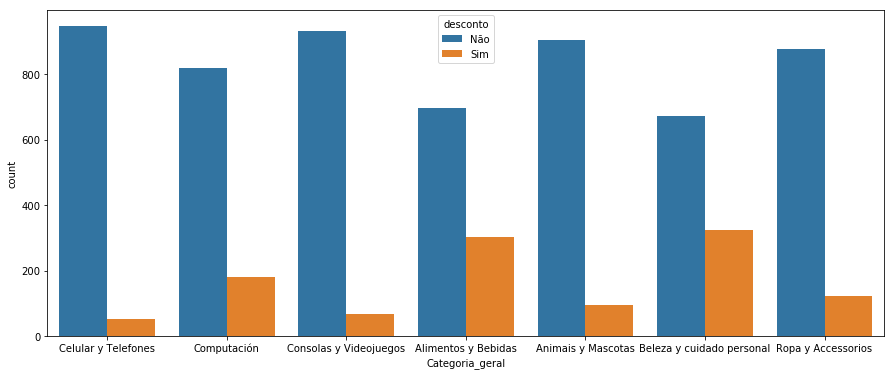

In [28]:
%matplotlib inline  
#Gráfico que mostra a contagem de observações com desconto em cada categoria.

plt.figure(figsize=(15,6))
ax = sns.countplot(x="Categoria_geral", hue="desconto", data=df)

#### Logo abaixo também é possivel ver o top5 marcas que mais dão desconto por categorias

In [29]:
#Top 5 Marcas que mais dão descontos dentro de cada grande Categoria_geral:
df["Desconto"] = [1 if a != 0 else 0 for a in df["original_price"]]

#Para isso, primeiro dividi em bases de cada categoria.
cel = df[df["Categoria_geral"]=="Celular y Telefones"]
comp = df[df["Categoria_geral"]=="Computación"]
video = df[df["Categoria_geral"]=="Consolas y Videojuegos"]
alimentos = df[df["Categoria_geral"]=="Alimentos y Bebidas"]
animal = df[df["Categoria_geral"]=="Animais y Mascotas"]
Belez = df[df["Categoria_geral"]=="Beleza y cuidado personal"]
rop = df[df["Categoria_geral"]=="Ropa y Accessorios"]

In [30]:
top_cel = cel.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_cel.head(5))  #Xiaomi

,Marca,counts
0,Xiaomi,9
1,Libercam,5
2,Baofeng,4
3,Baseus,3
4,Apple,3


In [31]:
top_comp = comp.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_comp.head(5))  #HP, Intel,AMD,Exo e Dell, destaque para HP com 31 produtos.

,Marca,counts
0,HP,31
1,Intel,15
2,AMD,12
3,Dell,10
4,Exo,10


In [32]:
top_video = video.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_video.head(5))  

,Marca,counts
0,OEM,7
1,Sí,6
2,Gadnic,5
3,Libercam,3
4,PlayStation,3


In [33]:
top_alimento = alimentos.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_alimento.head(5))  #1?, Nescafé, La Campagnola, Matarazzo e Lucchetti.

,Marca,counts
0,1,20
1,Nescafé Dolce Gusto,14
2,La Campagnola,8
3,Matarazzo,7
4,Lucchetti,7


In [34]:
top_animal = animal.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_animal.head(5))  #Royal Cani

,Marca,counts
0,Royal Canin,16
1,Excellent,8
2,Old Prince,8
3,Gadnic,7
4,Dogit,6


In [35]:
top_belez = Belez.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_belez.head(5))  #Lóreal Paris, La Roche-Posay, Isdin, Garnier e Maybeline.

,Marca,counts
0,L'Oréal Paris,29
1,La Roche-Posay,15
2,Isdin,14
3,Garnier,10
4,Maybelline,9


In [36]:
top_rop = rop.groupby(['Marca']).Desconto.sum().groupby(level=0, group_keys=False).head(5).sort_values(ascending=False).to_frame('counts').reset_index()
display(top_rop.head(5))  #Topper

,Marca,counts
0,Topper,23
1,Dufour,9
2,Aretha,6
3,Elemento,6
4,Nacia,5


#### No gráfico abaixo tem-se a média do valor de desconto, como o esperado, nota-se que os valores dos descontos são maiores nas categorias de informática e celulares onde os preços também são mais altos. Roupas, alimentos e bebidas e produtos de beleza e cuidado pessoal apresentaram os valores mais baixos.

C:\Users\estudos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


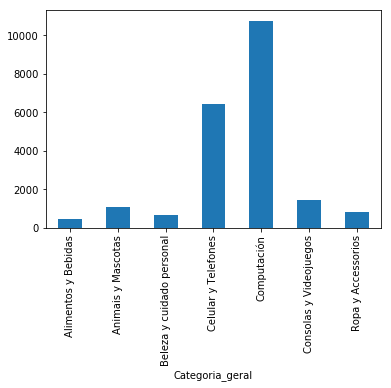

In [37]:
# Média de desconto por categoria:
Desconto = df[df["desconto"]=="Sim"]
Desconto["Valor_desconto"]=Desconto["Valor_desconto"].astype("float")
Desconto.groupby('Categoria_geral')['Valor_desconto'].mean().plot.bar()

#### Pode-se também identificar possiveis relações entre as variáveis Sold_quantity e desconto através de um boxplot por categoria.

#### Inicialmente foi construído um boxplot com todas observações da base, porém, notou-se valores muito altos de sold_quantity que faziam com que fosse impossivel analisar a distribuição da variável nas categorias, por isso foi feito um subset para pegar apenas os dados com sold_quantity abaixo de 2000.

#### A categoria que mais chamou atenção foi Consoles e videogames, é visivel que se o produto tem desconto a quantidade de produtos vendidos é maior, foi possivel também notar este mesmo comportamento mas de forma mais leve em Celulares e telefones e em animais e bichos de estimação. 

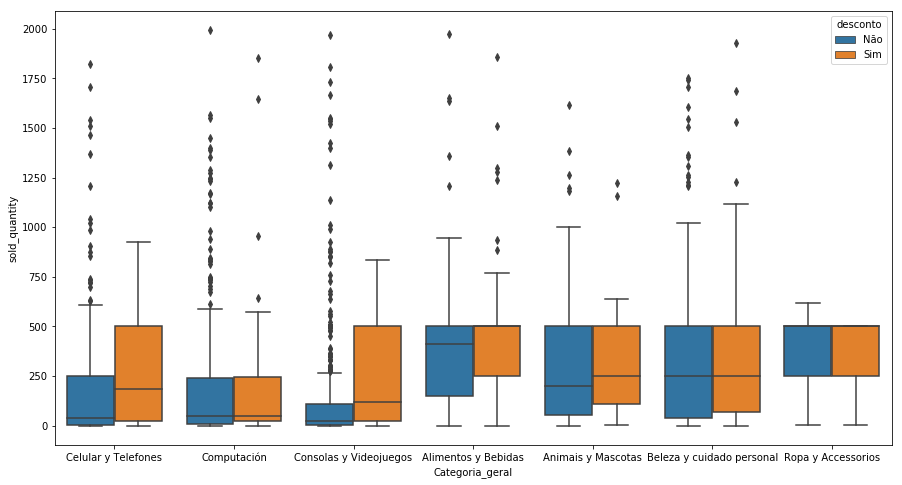

In [38]:
# qtd_vendida c/ desconto x qtd_vendida s/ desconto -> Boxplot

df_box = df[df["sold_quantity"]<2000]
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Categoria_geral", y="sold_quantity", hue="desconto", data=df_box)  # RUN PLOT  

#### Abaixo tem-se também um gráfico de dispersão para avaliar como se da a relação da variável sold_quantity com o preço para publicações com ou sem desconto. Pelo gráfico, nota-se uma leve relação negativa, quase que não notória.

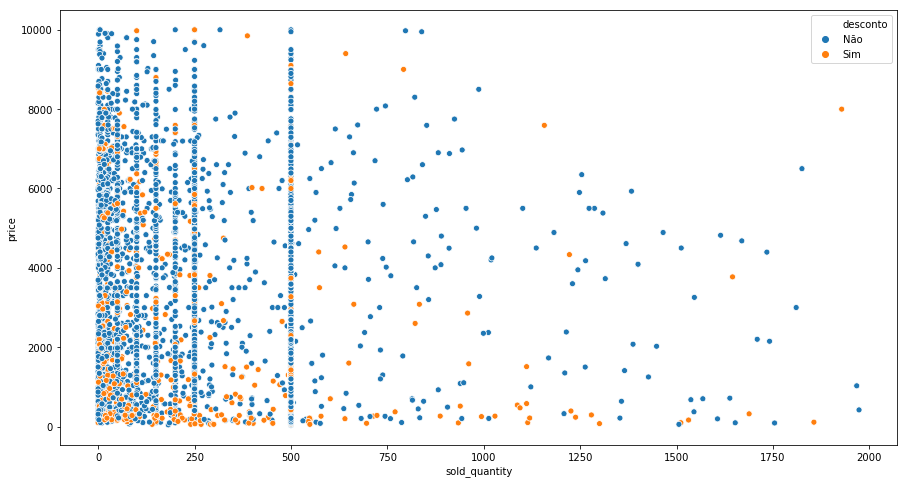

In [39]:
#Gráfico de dispersão #Qtd de itens vendidos x valor desconto desconto:
df_scatter = df_box[df_box["price"]<10000]
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="sold_quantity", y="price", hue="desconto", data=df_scatter)  # RUN PLOT

# 2. Modelo que prevê o resultado da variável sold_quantity

### Primeira parte: Construção da base de dados via API

#### Para a construção do modelo preditivo, foi escolhido trabalhar com os resultados da pesquisa TV4K sugeridos no desafio. Dessa forma, inicialmente foi feita a coleta das informações referentes a TV4k via API, seguindo o mesmo modelo de coleta da questão 1.

In [40]:
#Possivel Modelo : Modelo Poisson (?) 

#Tv 4k (Pesquisa para o modelo):

url = "https://api.mercadolibre.com/sites/MLA/search"
payload = ""
querystring = {"q":"tv 4k","offset":"0"}

response = requests.request("GET", url, data=payload, params=querystring).json()
df_tv = pd.DataFrame(response["results"])

limit=50
for page_num in range(1,20):
    #print("---------")
    offset = page_num*limit
    url = f"https://api.mercadolibre.com/sites/MLA/search?q=tv%204k&offset={offset}&limit={limit}"
    #print(url)
    response = requests.request("GET", url, data=payload).json()
    response = pd.DataFrame(response["results"])
    df_tv = df_tv.append(response)

df_tv.shape
#Base com 1000 obersavações relacionadas a TV 4K

(1000, 37)

#### Avaliando as variáveis disponíveis no conjunto de dados, foi decidido por eliminar algumas delas de acordo com o que vi no resumo delas, algumas possuiam apenas uma unica informação, outros apenas "NULL".

In [41]:
# Avaliando as variáveis diponíveis no conj. de dados, decedi por eliminar algumas baseado no que encontrei vendo o describe
#de cada uma delas 
df_tv = df_tv.loc[:,~df_tv.columns.isin(['prices','buying_mode','stop_time','permalink','thumbnail','thumbnail_id',
                                'installments','Accepts_mercagopago', 'seller_address','domain_id','catalog_product_id',
                               'tags','catalog_listing', 'use_thumbnail_id','winner_item_id','order_backend'])]

#### Assim como feito no exercício 1, para completar essa base de dados, foi adcionado também colunas com atributos que estavam dentro de outras listas ou dicionários dentro da própria base, são eles : "Marca","Status power Seller","State_name","free_shipping". Também foi criada a variável desconto e valor_desconto.

In [42]:
Marca = pd.DataFrame(df_tv['attributes'].tolist())
Marca = Marca.drop(Marca.columns[[1,2,3,4,5,6,7,8]], axis=1)
Marca.rename(columns={0:'Marca'}, inplace=True)
Marca = Marca["Marca"].apply(pd.Series)
Marca = Marca["value_name"]
Marca = pd.DataFrame(Marca)

In [43]:
Status_seller = pd.DataFrame(df_tv['seller'].tolist())
Status_seller = pd.DataFrame(Status_seller['seller_reputation'].tolist())
Status_seller = Status_seller.drop(Status_seller.columns[[0,1,3,4,5]], axis=1)
Status_seller.rename(columns={"power_seller_status":'Reputação_vendedor'}, inplace=True)
Status_seller = Status_seller["Reputação_vendedor"]
Status_seller = pd.DataFrame(Status_seller)

In [44]:
Nome_estado = pd.DataFrame(df_tv['address'].tolist())
Nome_estado = Nome_estado.drop(Nome_estado.columns[[0,2,3]], axis=1)
Nome_estado.rename(columns={"city_name":'Nome_estado'}, inplace=True)
Nome_estado = pd.DataFrame(Nome_estado)

In [45]:
entrega_gratis = pd.DataFrame(df_tv['shipping'].tolist())
entrega_gratis = entrega_gratis.drop(entrega_gratis.columns[[1,2,3,4]], axis=1)
entrega_gratis.rename(columns={"free_shipping":'entrega_gratis'}, inplace=True)
entrega_gratis = entrega_gratis["entrega_gratis"]
entrega_gratis = pd.DataFrame(entrega_gratis)

In [46]:
tv = pd.concat([df_tv.reset_index(drop=True), Marca], axis=1)
tv = pd.concat([tv.reset_index(drop=True), Status_seller], axis=1)
tv = pd.concat([tv.reset_index(drop=True), Nome_estado], axis=1)
tv = pd.concat([tv.reset_index(drop=True), entrega_gratis], axis=1)

In [47]:
#Definindo a base Final: #12 colunas
base_final = tv.iloc[:,[0,3,4,5,14,15,20,21,22,23,24,25]]
base_final.rename(columns={"value_name":'Marca'}, inplace=True)
base_final.shape

C:\Users\estudos\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(1000, 12)

In [48]:
base_final.isnull().sum() #Original Price ok, é o que define se tem desconto ou não, Marca e Reputação do vendedor 
#contém alguns NAs porém poucos

accepts_mercadopago      0
available_quantity       0
category_id              0
condition                0
original_price         951
price                    0
sold_quantity            0
title                    0
Marca                   22
Reputação_vendedor      88
Nome_estado              0
entrega_gratis           0
dtype: int64

In [49]:
base_final=base_final.fillna({'original_price':0})

In [50]:
base_final["desconto"] = ["Sim" if a != 0 else "Não" for a in base_final["original_price"]]

In [51]:
base_final["desconto"].describe()
#base_final

count     1000
unique       2
top        Não
freq       951
Name: desconto, dtype: object

In [52]:
#Variável valor_desconto:
import numpy as np

conditions = [
    (base_final["desconto"] == "Sim"),
base_final["desconto"]=="Não"]

values = [base_final["original_price"]-base_final["price"],0]
base_final['Valor_desconto'] = np.select(conditions, values)
#Desconto aplicado:

### Análise Exploratória da variável resposta : sold_quantity

#### Como nossa intenção é construir um modelo que tem como variável resposta "Sold_quantity", abaixo foi feita uma análise do comportamento dela:

#### Figura 1: De acordo com o primeiro histograma, pode-se já ver que a quantidade de produtos vendidos esta concentrada entre zero e mil e que temos alguns possiveis outliers, que podem afetar um determinado modelo construído. Dessa forma, decidiu-se para entender melhor como é a distribuição dessa variável, selecionarmos apenas as observações as quais sold_quantity é menor que mil. 

#### Figura 2: No segundo histograma, já com a eliminação de valores acima de 1000 consegue-se entender um pouco melhor como é a distribuição, nota-se ainda que existem algumas observações com quantidade alta de vendas que se destoam totalmente do que ocorre com maior frequência. Com isso foi feito um terceiro gráfico de histograma, para avaliar como se comportam esses dados chamados de outliers. Para isso, pegamos todos os dados que estão com sold_quantity acima de 100. 

#### Figura 3: O histograma 3, mostra como se comportam estes valores discrepantes, maiores que 100, e parece ser suficiente pensar em ficar com o valor de sold_quantity até 500.

##### Figura 4: Por fim ainda podemos ver na figura 4 entre as observações discrepantes o quanto estes altos valores podem estar associados a variável category_id

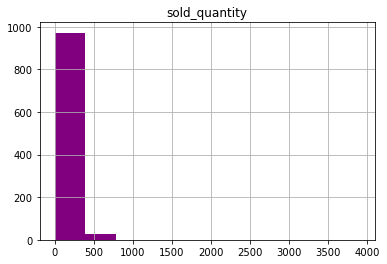

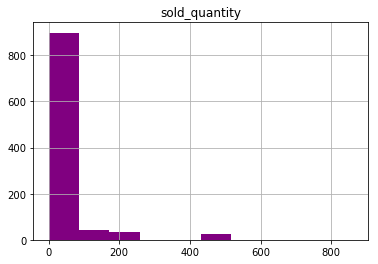

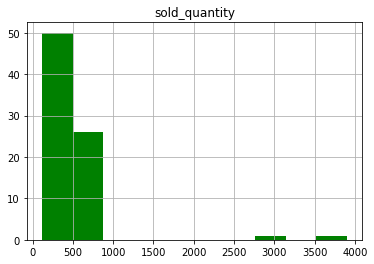

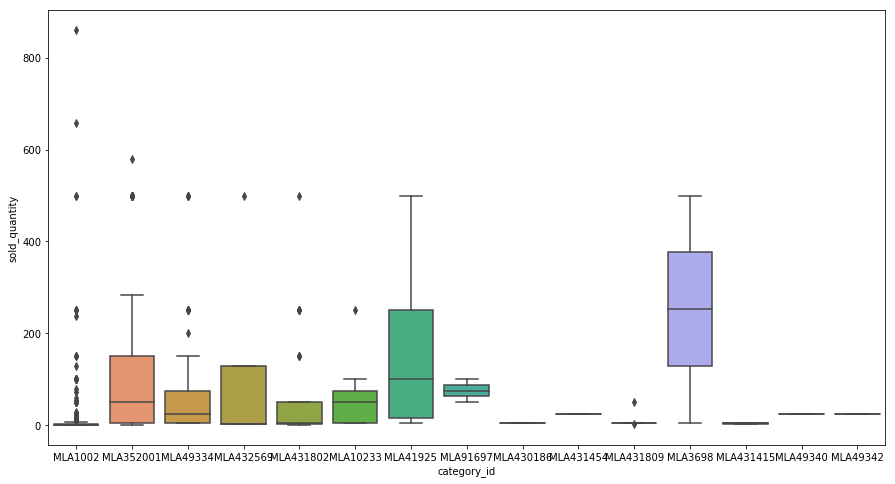

In [54]:
base_final.hist("sold_quantity",color="purple")
#Tirar outliers, nitidamente existem valores descrepantes, trabalhar com quantidades abaixo de 1500

base_final_1 = base_final[(base_final["sold_quantity"]<1000)] 
base_final_1.hist("sold_quantity",color="purple")

base_qtd_altas = base_final[(base_final["sold_quantity"]>100)]
base_qtd_altas.columns
base_qtd_altas.groupby("category_id")["sold_quantity"].describe()

base_qtd_altas.hist("sold_quantity",color="green")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="category_id", y="sold_quantity", data=base_final_1)  # RUN PLOT  

##### Abaixo nas próximas figuras, pode-se ver agora como se distribui a variável dentro das categorias de id e
##### pelo histograma o comportamento da variável.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016C7BD68>]],
      dtype=object)

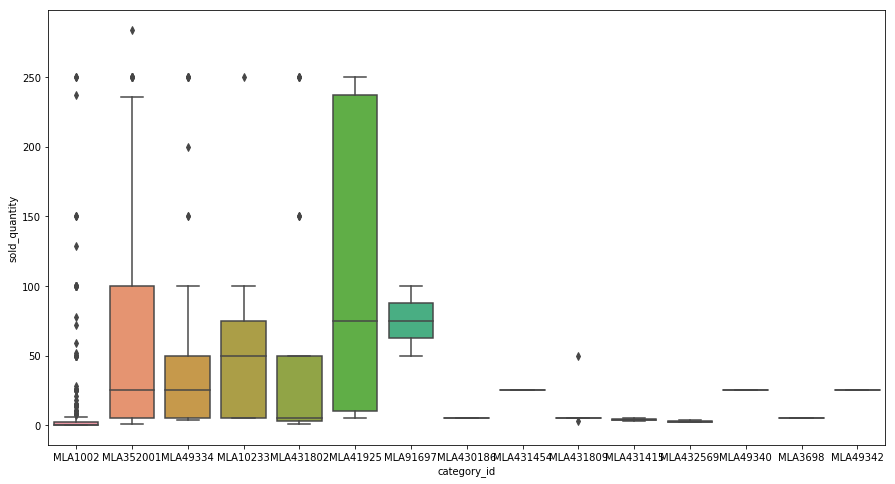

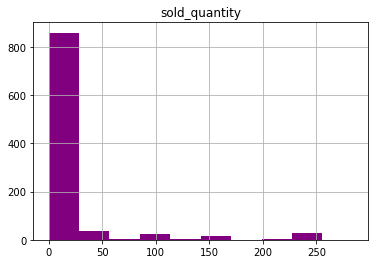

In [55]:
#Construindo a base com sold_quantity < 500
base_final_2 = base_final[(base_final["sold_quantity"]<500)]
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="category_id", y="sold_quantity", data=base_final_2)

base_final_2.hist("sold_quantity",color="purple")
# RUN PLOT  

#### Nos gráficos abaixo, temos a relação entre a variável sold_quantity com outras variáveis do banco de dados: Pode-se notar que entrega_gratis, available_quantity, valor_desconto e preço parecem não ter relação com a variável resposta, enquanto que Reputação do vendedor e desconto parecem ser as variáveis que possuem a maior relação. Além de uma possivel relação com a Marca e Nome_estado. Vale lembrar que vimos que a variável category_id também possui uma possivel relação. Ao final no gráfico de correlação das variáveis quantitativas com sold_quantity,  vemos que as relações são baixas entre elas.


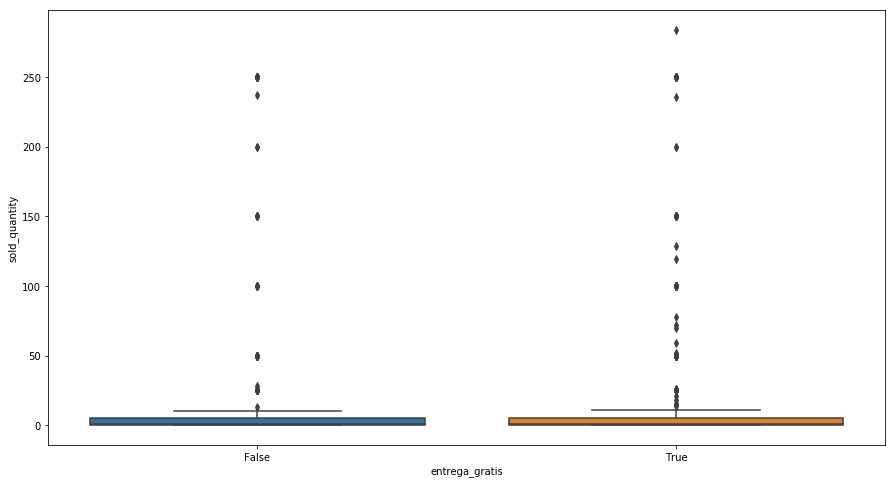

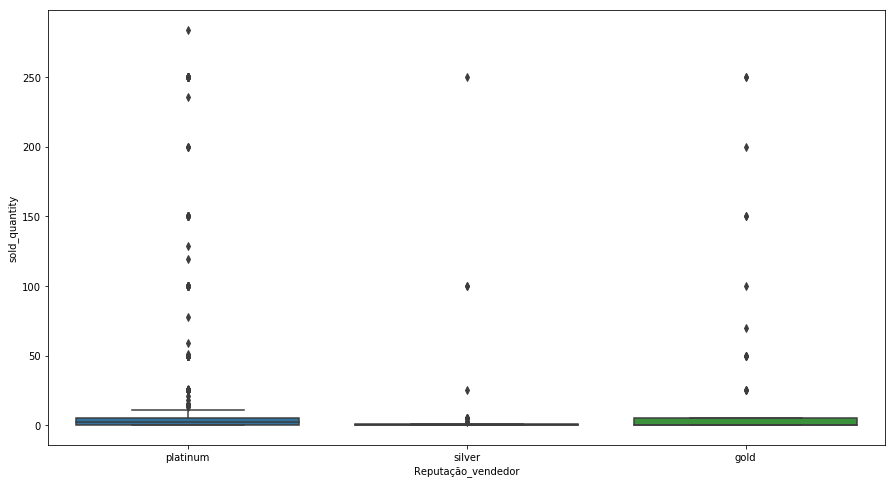

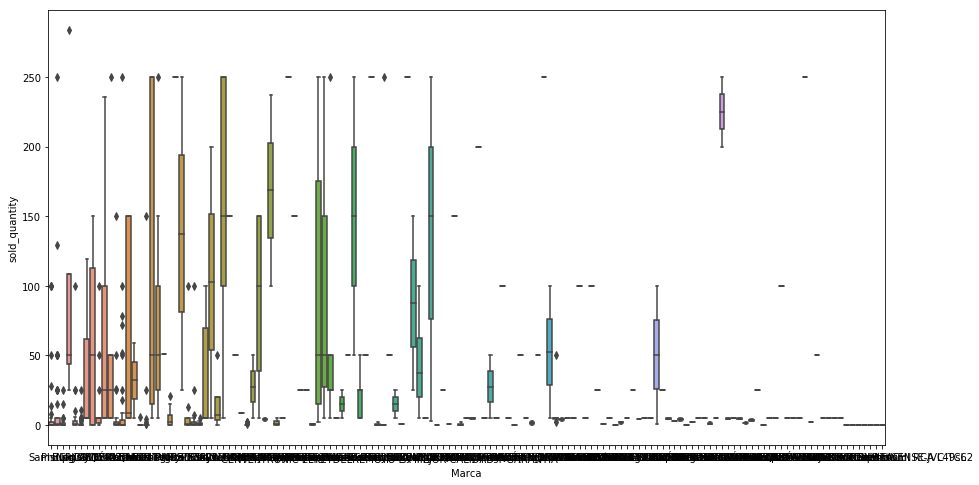

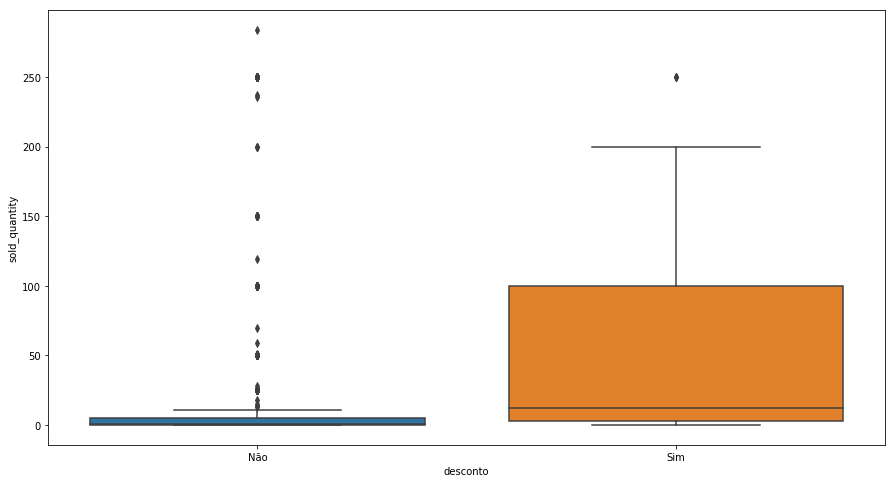

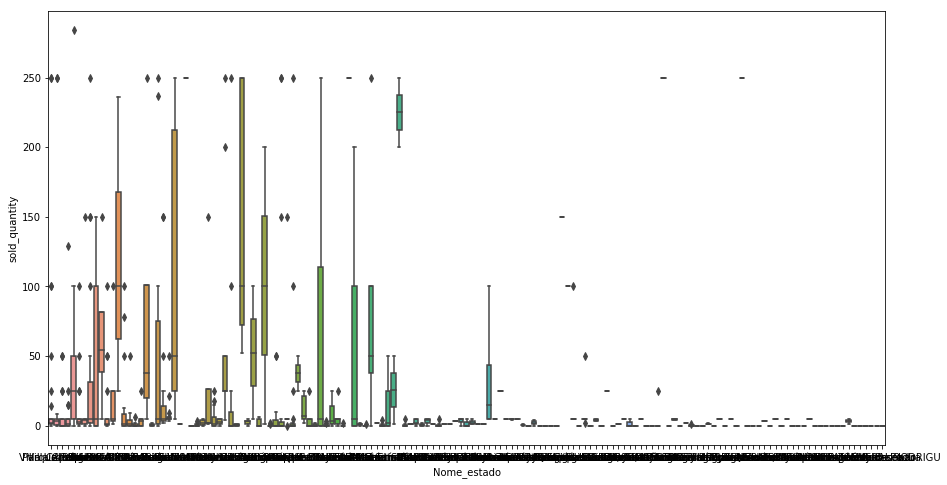

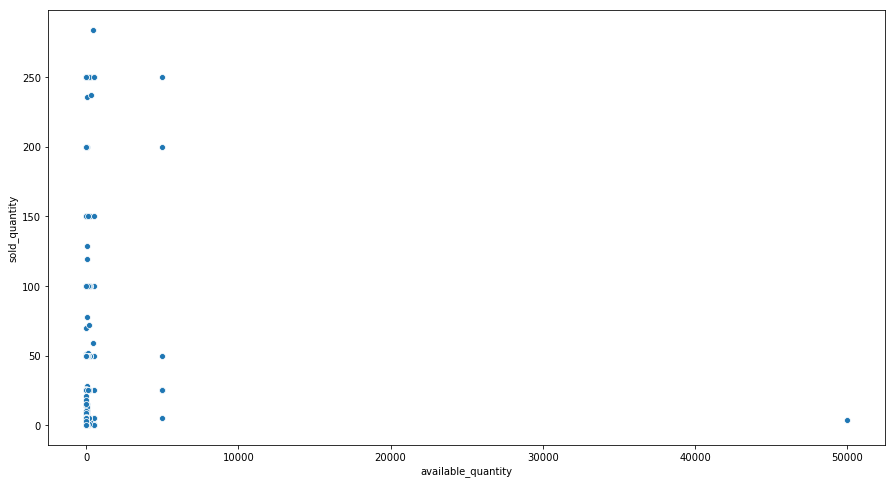

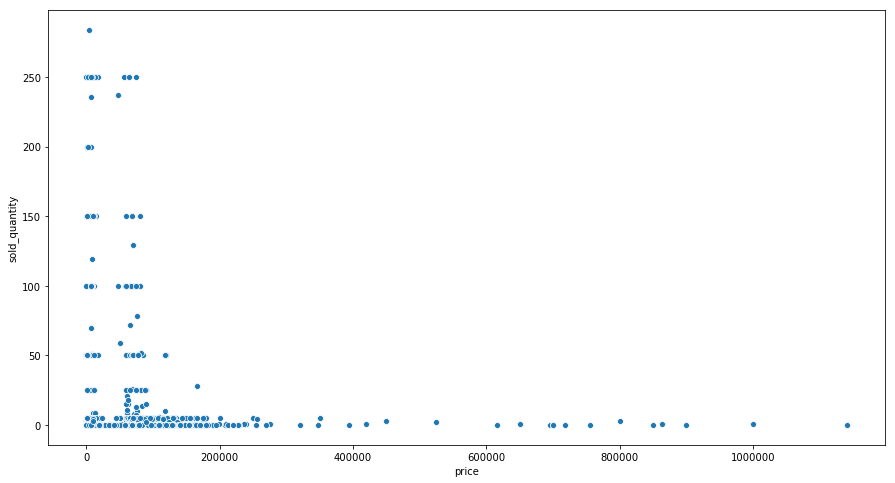

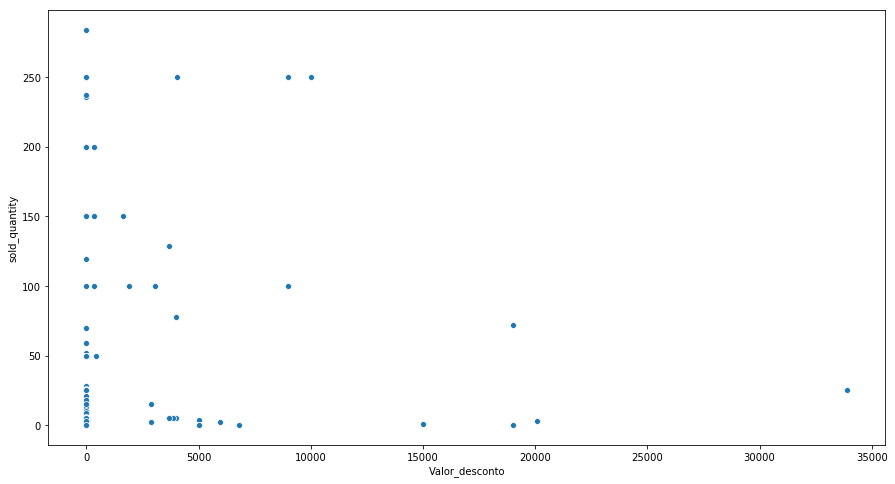

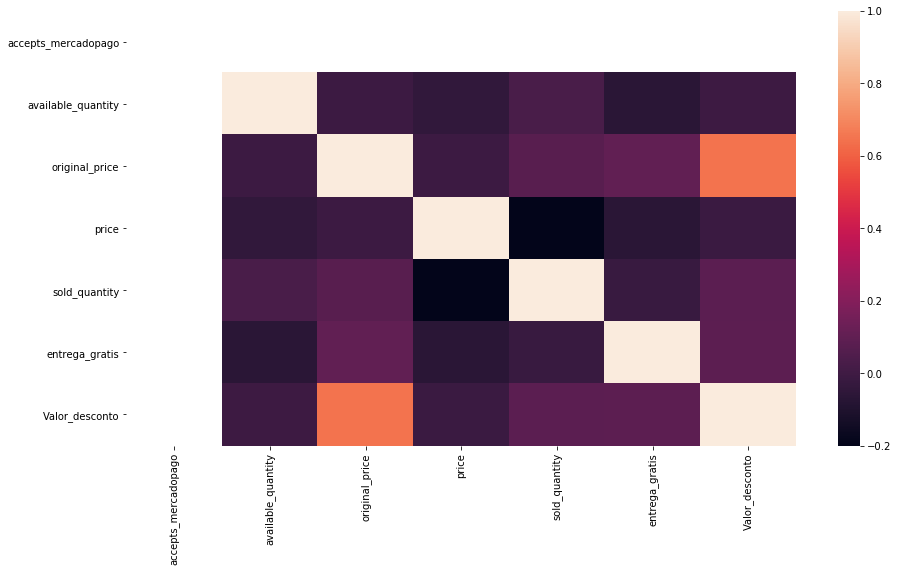

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="entrega_gratis", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Reputação_vendedor", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Marca", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="desconto", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Nome_estado", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="available_quantity", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="price", y="sold_quantity", data=base_final_2)

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Valor_desconto", y="sold_quantity", data=base_final_2)

corr = base_final_2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr)

In [59]:
base_final_2.dropna(inplace=True) #Excluindo NA's que poderão afetar o modelo.

C:\Users\estudos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Modelo preditivo (Regressão de Poisson)

#### A variável resposta do modelo é uma variável quantitativa, que assume valores positivos e inteiros, dessa forma, um possível modelo que parece ser razoável para se utilizar é um modelo da classe dos modelos lineares generalizados (GLM), chamado de Regressão de Poisson.

#### Para construir o modelo, inicialmente dividimos nossa base de dados em base de treino e base de teste, para podermos avaliar se o mesmo irá performar bem. Então foi definido que 80% dos dados serão treino e 20% teste.

In [60]:
#Modelo de regressão de Poisson : Para contagens.

import pandas as pd
from patsy import dmatrices 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


#Criação dos dados de treino e dos dados de teste:
mask = np.random.rand(len(base_final_2)) < 0.8 #80% dos meus dados são treino
df_treino = base_final_2[mask] # tudo o que for mask.
df_teste = base_final_2[~mask] # o que não é mask 20%

print("tamanho do banco de dados treino="+str(len(df_treino)))
print("tamanho do banco de dados teste="+str(len(df_teste)))

#Montando a expressão que será em função da variável dependente: sold_quantity e as variáveis independentes que serão
#consideradas no modelo: inicialmente vamos utilizar as seguintes variáveis:

expressao = """sold_quantity ~ price + desconto + Reputação_vendedor + category_id"""

tamanho do banco de dados treino=684
tamanho do banco de dados teste=181


#### Analisando o resultado do primeiro modelo, podemos ver que com relação a única variável explicativa quantitativa presente no modelo, que é price, apresentou significância e tem um efeito negativo na quantidade de vendas, ou seja, conforme aumenta diminui a quantidade. Dentre as variáveis explicativas categóricas, nota-se que a variável desconto também é significativa e que o "sim" para o desconto representa 47% no aumento da quantidade de vendas. Com relação a variável category_id, vemos que algumas possuem efeito e estes foram estatísticamente diferentes do intercepto, tendo incrementos positivos e negativos dependendo da categoria. Por fim, outra variável que também apresentou significância foi a categoria de reputação do vendedor quando a mesma é "Silver", com efeito negativo e quando é Platinum positvo.  A próxima etapa foi avaliar a qualidade do ajuste desse modelo.

In [61]:
#Matrizes x e y para colocar na função do modelo:

y_train, X_train = dmatrices(expressao, df_treino, return_type="dataframe")
y_test, X_test = dmatrices(expressao,df_teste, return_type="dataframe")

#Usando o statsmodes para utilizar a função GLM (Modelos Lineares Generalizados) o qual possui o modelo de regressão de Poisson
#Aplicando nos dados de treino:

poisson_treino_resultado = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Printar o resumo:
print(poisson_treino_resultado.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          sold_quantity   No. Observations:                  684
Model:                            GLM   Df Residuals:                      666
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10340.
Date:                Mon, 27 Dec 2021   Deviance:                       19229.
Time:                        03:03:29   Pearson chi2:                 4.07e+07
No. Iterations:                     7   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.4635      0.089     27.597      0.000       2.289     

#### Na hora de se avaliar a qualidade de ajuste do modelo via gráfico de valores preditos x valores reais, foi resultado um erro, provavelmente por conta da variável category_id que possui algumas com apenas 1 quantidade especificada em todo conjunto de dados.

#### Dado o resultado encontrado na variável  category_id, foi criada uma nova categoria unindo-se as categorias que não apresentaram significancia estatística para o modelo e também feita a exclusão de categorias que possuiam uma única observação para se ajustar um novo modelo.

In [63]:
#Variável category_id nova:

boolean_condition = ((base_final_2.category_id == "MLA3698") | (base_final_2.category_id == "MLA41925") | (base_final_2.category_id == "MLA430186") 
| (base_final_2.category_id == "MLA431415") | (base_final_2.category_id == "MLA431802") | (base_final_2.category_id == "MLA431809") |
(base_final_2.category_id == "MLA432569"))

column_name = "category_id"
new_value = "MLA_model"

base_final_2.loc[boolean_condition, column_name] = new_value

#df.loc[:, 'color'] = df.apply(color, axis = 1)

C:\Users\estudos\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [64]:
base_final_2.drop(base_final_2[base_final_2.category_id == "MLA431454"].index, inplace=True)
base_final_2.groupby("category_id")["sold_quantity"].describe()


C:\Users\estudos\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
MLA1002,664.0,4.054217,14.716939,0.0,0.00,0.0,2.0,150.0
MLA10233,6.0,76.666667,91.960136,5.0,16.25,50.0,87.5,250.0
MLA352001,71.0,66.000000,83.142219,1.0,5.00,25.0,100.0,284.0
MLA49334,55.0,53.672727,80.110584,4.0,5.00,25.0,50.0,250.0
MLA49340,1.0,25.000000,NaN,25.0,25.00,25.0,25.0,25.0
MLA49342,1.0,25.000000,NaN,25.0,25.00,25.0,25.0,25.0
MLA91697,1.0,100.000000,NaN,100.0,100.00,100.0,100.0,100.0
MLA_model,65.0,50.276923,85.598720,1.0,4.00,5.0,50.0,250.0


In [65]:
base_final_2.drop(base_final_2[base_final_2.category_id == "MLA49340"].index, inplace=True)
base_final_2.groupby("category_id")["sold_quantity"].describe()

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
MLA1002,664.0,4.054217,14.716939,0.0,0.00,0.0,2.0,150.0
MLA10233,6.0,76.666667,91.960136,5.0,16.25,50.0,87.5,250.0
MLA352001,71.0,66.000000,83.142219,1.0,5.00,25.0,100.0,284.0
MLA49334,55.0,53.672727,80.110584,4.0,5.00,25.0,50.0,250.0
MLA49342,1.0,25.000000,NaN,25.0,25.00,25.0,25.0,25.0
MLA91697,1.0,100.000000,NaN,100.0,100.00,100.0,100.0,100.0
MLA_model,65.0,50.276923,85.598720,1.0,4.00,5.0,50.0,250.0


In [66]:
base_final_2.drop(base_final_2[base_final_2.category_id == "MLA49342"].index, inplace=True)
base_final_2.groupby("category_id")["sold_quantity"].describe()

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
MLA1002,664.0,4.054217,14.716939,0.0,0.00,0.0,2.0,150.0
MLA10233,6.0,76.666667,91.960136,5.0,16.25,50.0,87.5,250.0
MLA352001,71.0,66.000000,83.142219,1.0,5.00,25.0,100.0,284.0
MLA49334,55.0,53.672727,80.110584,4.0,5.00,25.0,50.0,250.0
MLA91697,1.0,100.000000,NaN,100.0,100.00,100.0,100.0,100.0
MLA_model,65.0,50.276923,85.598720,1.0,4.00,5.0,50.0,250.0


In [67]:
base_final_2.drop(base_final_2[base_final_2.category_id == "MLA91697"].index, inplace=True)
base_final_2.groupby("category_id")["sold_quantity"].describe()

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
MLA1002,664.0,4.054217,14.716939,0.0,0.00,0.0,2.0,150.0
MLA10233,6.0,76.666667,91.960136,5.0,16.25,50.0,87.5,250.0
MLA352001,71.0,66.000000,83.142219,1.0,5.00,25.0,100.0,284.0
MLA49334,55.0,53.672727,80.110584,4.0,5.00,25.0,50.0,250.0
MLA_model,65.0,50.276923,85.598720,1.0,4.00,5.0,50.0,250.0


In [68]:
#Criação dos dados de treino e dos dados de teste:
mask = np.random.rand(len(base_final_2)) < 0.8 #80% dos meus dados são treino
df_treino = base_final_2[mask] # tudo o que for mask.
df_teste = base_final_2[~mask] # o que não é mask 20%

print("tamanho do banco de dados treino="+str(len(df_treino)))
print("tamanho do banco de dados teste="+str(len(df_teste)))

#Montando a expressão que será em função da variável dependente: sold_quantity e as variáveis independentes que serão
#consideradas no modelo: inicialmente vamos utilizar as seguintes variáveis:

expressao = """sold_quantity ~ price + desconto + Reputação_vendedor + category_id"""

tamanho do banco de dados treino=686
tamanho do banco de dados teste=175


### Resultado do segundo modelo:Todas variáveis deram significativas, seguindo mesma interpretação:

In [69]:
#Matrizes x e y para colocar na função do modelo:

y_train, X_train = dmatrices(expressao, df_treino, return_type="dataframe")
y_test, X_test = dmatrices(expressao,df_teste, return_type="dataframe")

#Usando o statsmodes para utilizar a função GLM (Modelos Lineares Generalizados) o qual possui o modelo de regressão de Poisson
#Aplicando nos dados de treino:

poisson_treino_resultado = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Printar o resumo:
print(poisson_treino_resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          sold_quantity   No. Observations:                  686
Model:                            GLM   Df Residuals:                      677
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12133.
Date:                Mon, 27 Dec 2021   Deviance:                       22755.
Time:                        03:10:23   Pearson chi2:                 3.77e+09
No. Iterations:                     7   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.3359      0.079     42.232      0.000       3.181     

#### No gráfico abaixo que avalia a qualidade de ajuste do modelo, sendo a linha vermelha o real resultado e a verde os valores preditos, nota-se que apesar de algumas observações estarem se comportando como a distribuição dos dados reais, a grande maioria esta bem distante do resultado ideal, possivelmente resultando em um erro de estimação dos resultados bem alta. Uma alternativa seria tentar realizar alguma transformação na variável price, deixando a mesma como uma variável categórica, ou tentando fazer algumas categorizações novamente na variável category_id, ou ainda buscando incluir mais variáveis no modelo que não colocamos como Marca e Nome_estado.

          mean   mean_se  mean_ci_lower  mean_ci_upper
19    7.614320  0.186664       7.257115       7.989108
24    8.501157  0.228025       8.065781       8.960034
36   51.011936  1.209477      48.695642      53.438410
41    3.564667  0.094907       3.383422       3.755622
56   51.108205  1.211918      48.787242      53.539584
58    8.111787  0.209165       7.712017       8.532280
61   15.083664  0.536256      14.068404      16.172191
65    5.970733  0.128036       5.724988       6.227027
69    4.028861  0.097220       3.842749       4.223987
74    6.321542  0.138223       6.056352       6.598343
86    4.553502  0.101588       4.358684       4.757027
95    4.553502  0.101588       4.358684       4.757027
99    1.990499  0.086463       1.828047       2.167387
102  13.012639  0.442367      12.173869      13.909200
116  15.257316  0.544773      14.226085      16.363300
119   4.618848  0.102306       4.422622       4.823781
122   5.299786  0.112570       5.083682       5.525077
132   5.57

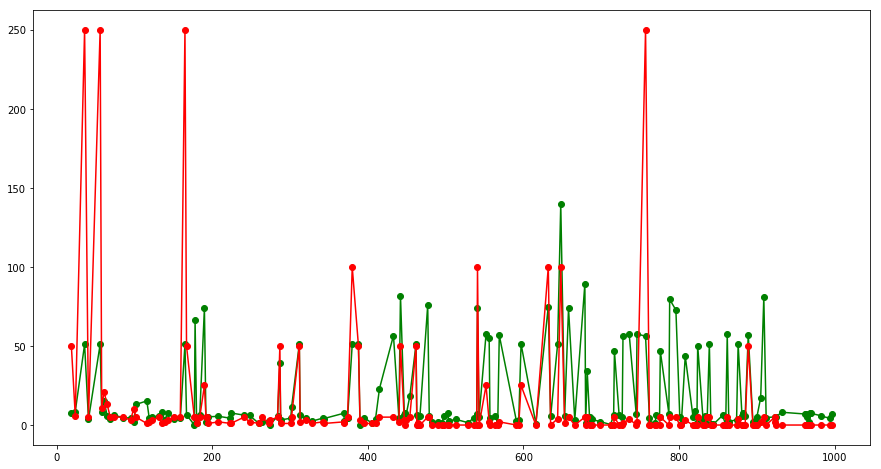

In [71]:
#fazendo algumas previsões com a base de teste:
#aplicando a base de teste-> 
poisson_predictions = poisson_treino_resultado.get_prediction(X_test) #Aplica a base teste no modelo.
predictions_summary_frame = poisson_predictions.summary_frame() #coloca os resultados em um dataframe com os ICs
print(predictions_summary_frame) 

predicted_counts = predictions_summary_frame["mean"] #Resultados da previsão
actual_counts = y_test["sold_quantity"] #Resultados reais 

plt.figure(figsize=(15,8))
predicted, = plt.plot(X_test.index, predicted_counts, "go-", label = "predicted counts")
actua, = plt.plot(X_test.index, actual_counts, "ro-", label="actual counts")
plt.show()

#### Abaixo ainda se encontra um gráfico de dispersão entre os valores previstos x valores reais afim de se ver se eles possuem correlação forte, pode-se ver que os dados não possuem correlação aparente.

<Figure size 432x288 with 0 Axes>

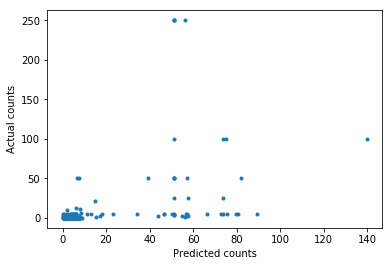

In [72]:
#Gráfico de dispersão que avalia a relação dos dados previstos x atuais:

plt.clf()
fig=plt.figure()
plt.scatter(x=predicted_counts, y=actual_counts, marker=".")
plt.xlabel("Predicted counts")
plt.ylabel("Actual counts")
plt.show()

## Considerações finais:

#### Com o resultado de um modelo não ajustado bem aos dados, poderíamos buscar outras alternativas: incluir novas variáveis, realizar transformações em atributos já existentes, como por exemplo, unirmos categorias onde as informações possuem a mesma distribuição de sold_quantity ou avaliar a existência de um outro modelo que atende o problema.